In [147]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [148]:
filename = 'N-CMAPSS_DS01-005.h5'

In [149]:
t = time.process_time()  

# Load data
with h5py.File(filename, 'r') as hdf:
        # Development set
        
        W_dev = np.array(hdf.get('W_dev'))             # W
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL  
        A_test = np.array(hdf.get('A_test'))           # Auxiliary
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))  
        X_v_var = np.array(hdf.get('X_v_var')) 
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))
        
        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        X_v_var = list(np.array(X_v_var, dtype='U20')) 
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))
                          
W = np.concatenate((W_dev, W_test), axis=0)  
X_s = np.concatenate((X_s_dev, X_s_test), axis=0)
X_v = np.concatenate((X_v_dev, X_v_test), axis=0)
T = np.concatenate((T_dev, T_test), axis=0)
Y = np.concatenate((Y_dev, Y_test), axis=0) 
A = np.concatenate((A_dev, A_test), axis=0) 
    
print('')
print("Operation time (min): " , (time.process_time()-t)/60)
print('')
print ("W shape: " + str(W.shape))
print ("X_s shape: " + str(X_s.shape))
print ("X_v shape: " + str(X_v.shape))
print ("T shape: " + str(T.shape))
print ("A shape: " + str(A.shape))


Operation time (min):  0.21796875

W shape: (7641868, 4)
X_s shape: (7641868, 14)
X_v shape: (7641868, 14)
T shape: (7641868, 10)
A shape: (7641868, 4)


In [150]:
df_A = DataFrame(data=A, columns=A_var)
df_A.describe()
df_A.head()

,unit,cycle,Fc,hs
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


In [107]:
df_W = DataFrame(data=W, columns=W_var)
df_W.describe()
df_W.head()

,alt,Mach,TRA,T2
0,10005.0,0.448497,76.903748,502.420918
1,10013.0,0.447741,76.903748,502.326114
2,10017.0,0.448938,77.079529,502.416067
3,10024.0,0.449883,77.079529,502.469893
4,10031.0,0.449379,77.079529,502.401271


In [151]:
units = np.unique(df_A['unit'])
print(units)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Text(0, 0.5, 'Flight Class # [-]')

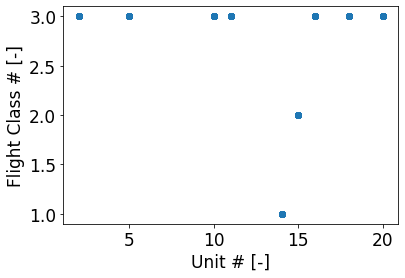

In [109]:
labelsize = 17
plt.plot(df_A.unit, df_A.Fc, 'o')
plt.tick_params(axis='x', labelsize=labelsize )
plt.tick_params(axis='y', labelsize=labelsize )
plt.xlabel('Unit # [-]', fontsize=labelsize)
plt.ylabel('Flight Class # [-]', fontsize=labelsize )


In [110]:
df_W = DataFrame(data=W, columns=W_var)
df_W.head()

,alt,Mach,TRA,T2
0,10005.0,0.448497,76.903748,502.420918
1,10013.0,0.447741,76.903748,502.326114
2,10017.0,0.448938,77.079529,502.416067
3,10024.0,0.449883,77.079529,502.469893
4,10031.0,0.449379,77.079529,502.401271


In [111]:
df_W['unit'] = df_A['unit'].values
df_W['cycle'] = df_A['cycle'].values
df_W['Fc'] = df_A['Fc'].values
df_W['hs'] = df_A['hs'].values

In [112]:
df_W.head()

,alt,Mach,TRA,T2,unit,cycle,Fc,hs
0,10005.0,0.448497,76.903748,502.420918,2.0,1.0,3.0,1.0
1,10013.0,0.447741,76.903748,502.326114,2.0,1.0,3.0,1.0
2,10017.0,0.448938,77.079529,502.416067,2.0,1.0,3.0,1.0
3,10024.0,0.449883,77.079529,502.469893,2.0,1.0,3.0,1.0
4,10031.0,0.449379,77.079529,502.401271,2.0,1.0,3.0,1.0


In [113]:
df_X_s = DataFrame(data=X_s, columns=X_s_var)
df_X_s.describe()
df_X_s.head()

,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf
0,600.148034,1438.498187,1818.027714,1228.129848,15.806267,11.577097,16.046971,20.126624,331.293679,336.631827,12.629361,2160.926416,8591.373490,3.855337
1,600.055894,1438.350208,1817.682618,1227.879113,15.795477,11.568235,16.036017,20.113218,331.109867,336.446748,12.623033,2160.909333,8590.972866,3.852319
2,600.210756,1439.109101,1820.020627,1229.422522,15.807747,11.574866,16.048474,20.130956,331.753181,337.082502,12.637951,2161.819062,8593.031745,3.866201
3,600.369717,1439.240230,1819.188327,1228.538726,15.816360,11.578198,16.057218,20.146716,331.819136,337.162828,12.631509,2162.768666,8593.781545,3.863328
4,600.298227,1439.064004,1818.963540,1228.389046,15.807513,11.571593,16.048236,20.135888,331.626003,336.966936,12.624872,2162.619544,8593.220200,3.860818


In [114]:
df_X_s['unit'] = df_A['unit'].values
df_X_s['cycle'] = df_A['cycle'].values
df_X_s['Fc'] = df_A['Fc'].values
df_X_s['hs'] = df_A['hs'].values

df_X_s.head()

,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf,unit,cycle,Fc,hs
0,600.148034,1438.498187,1818.027714,1228.129848,15.806267,11.577097,16.046971,20.126624,331.293679,336.631827,12.629361,2160.926416,8591.373490,3.855337,2.0,1.0,3.0,1.0
1,600.055894,1438.350208,1817.682618,1227.879113,15.795477,11.568235,16.036017,20.113218,331.109867,336.446748,12.623033,2160.909333,8590.972866,3.852319,2.0,1.0,3.0,1.0
2,600.210756,1439.109101,1820.020627,1229.422522,15.807747,11.574866,16.048474,20.130956,331.753181,337.082502,12.637951,2161.819062,8593.031745,3.866201,2.0,1.0,3.0,1.0
3,600.369717,1439.240230,1819.188327,1228.538726,15.816360,11.578198,16.057218,20.146716,331.819136,337.162828,12.631509,2162.768666,8593.781545,3.863328,2.0,1.0,3.0,1.0
4,600.298227,1439.064004,1818.963540,1228.389046,15.807513,11.571593,16.048236,20.135888,331.626003,336.966936,12.624872,2162.619544,8593.220200,3.860818,2.0,1.0,3.0,1.0


In [115]:
df_X_v = DataFrame(data=X_v, columns=X_v_var)
df_X_v.describe()
df_X_v.head()

,T40,P30,P45,W21,W22,W25,W31,W32,W48,W50,SmFan,SmLPC,SmHPC,phi
0,2797.727106,352.494060,62.768751,2420.557738,228.486927,228.487065,26.498785,15.899271,215.844851,228.411666,16.648833,9.898130,25.376144,41.893990
1,2797.209328,352.300260,62.734717,2418.935113,228.382424,228.383505,26.486552,15.891931,215.745634,228.307014,16.639222,9.904927,25.380549,41.884434
2,2800.736255,352.965971,62.851755,2421.245669,228.651138,228.661083,26.519340,15.911604,216.019054,228.592279,16.649823,9.923503,25.318848,41.953848
3,2799.352383,353.050081,62.873081,2422.941615,228.786949,228.768625,26.532044,15.919226,216.121238,228.702994,16.653812,9.905518,25.361981,41.914342
4,2799.034785,352.844959,62.836600,2421.608933,228.651685,228.653631,26.518460,15.911076,216.008509,228.584788,16.649031,9.897465,25.363994,41.911503


In [116]:
df_X_v['unit'] = df_A['unit'].values
df_X_v['cycle'] = df_A['cycle'].values
df_X_v['Fc'] = df_A['Fc'].values
df_X_v['hs'] = df_A['hs'].values

df_X_v.head()

,T40,P30,P45,W21,W22,W25,W31,W32,W48,W50,SmFan,SmLPC,SmHPC,phi,unit,cycle,Fc,hs
0,2797.727106,352.494060,62.768751,2420.557738,228.486927,228.487065,26.498785,15.899271,215.844851,228.411666,16.648833,9.898130,25.376144,41.893990,2.0,1.0,3.0,1.0
1,2797.209328,352.300260,62.734717,2418.935113,228.382424,228.383505,26.486552,15.891931,215.745634,228.307014,16.639222,9.904927,25.380549,41.884434,2.0,1.0,3.0,1.0
2,2800.736255,352.965971,62.851755,2421.245669,228.651138,228.661083,26.519340,15.911604,216.019054,228.592279,16.649823,9.923503,25.318848,41.953848,2.0,1.0,3.0,1.0
3,2799.352383,353.050081,62.873081,2422.941615,228.786949,228.768625,26.532044,15.919226,216.121238,228.702994,16.653812,9.905518,25.361981,41.914342,2.0,1.0,3.0,1.0
4,2799.034785,352.844959,62.836600,2421.608933,228.651685,228.653631,26.518460,15.911076,216.008509,228.584788,16.649031,9.897465,25.363994,41.911503,2.0,1.0,3.0,1.0


In [152]:
df_T = DataFrame(data=T, columns=T_var)
df_T.describe()
#df_T.head()

,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod
count,7641868.0,7641868.0,7641868.0,7641868.0,7641868.0,7641868.0,7.641868e+06,7641868.0,7641868.0,7641868.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,-4.022709e-03,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,4.237157e-03,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,-1.880555e-02,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,-5.414800e-03,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,-2.099357e-03,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,-1.165998e-03,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,-1.173363e-04,0.0,0.0,0.0


In [153]:
df_T['unit'] = df_A['unit'].values
df_T['cycle'] = df_A['cycle'].values
df_T['Fc'] = df_A['Fc'].values
df_T['hs'] = df_A['hs'].values

df_T.head()

,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,cycle,Fc,hs
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [154]:
def plot_df_single_color(data, variables, labels, size=12, labelsize=17, name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)    
    fig  = plt.figure(figsize=(size,max(size,rows*2))) 
    
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        ax.plot(data[variables[n]], marker='.', markerfacecolor='none', alpha = 0.7)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)
        plt.ylabel(labels[n], fontsize=labelsize)
        plt.xlabel('Time [s]', fontsize=labelsize)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

In [162]:
#plot_df_color_per_unit(df_W_u, W_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')

def plot_df_color_per_unit(data, variables, labels, size=7, labelsize=17, option='cycle', name=None):

    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    #rows = cols*2
    gs   = gridspec.GridSpec(rows, cols)
    leg  = []
    fig  = plt.figure(figsize=(size,max(size,rows*2)))
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    #unit_sel  = np.unique(data['unit'])
    unit_sel=[2]
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for j in unit_sel:
            data_unit = data.loc[data['unit'] == j]
            if option=='cycle':
                time_s = data.loc[data['unit'] == j, 'cycle']
                label_x = 'Time [cycle]'
            else:
                time_s = np.arange(len(data_unit))
                label_x = 'Time [s]'
            ax.plot(time_s, data_unit[variables[n]],'-o',color=color_dic_unit['Unit ' + str(int(j))],alpha=0.7,markersize=5)
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
            leg.append('Unit '+str(int(j)))
        plt.ylabel(labels[n], fontsize=labelsize)    
        plt.xlabel(label_x, fontsize=labelsize)
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        if n==0:
            ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.legend(leg, loc='best', fontsize=labelsize-2) #lower left
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

In [134]:
df_W_u = df_W.loc[(df_A.unit == 2) & (df_A.hs == 1)]
df_W_v = df_W.loc[(df_A.unit == 2) & (df_A.hs == 0)]

In [135]:
df_W_u.reset_index(inplace=True, drop=True)
df_W_v.reset_index(inplace=True, drop=True)
df_W_u.head()

,alt,Mach,TRA,T2,unit,cycle,Fc,hs
0,10005.0,0.448497,76.903748,502.420918,2.0,1.0,3.0,1.0
1,10013.0,0.447741,76.903748,502.326114,2.0,1.0,3.0,1.0
2,10017.0,0.448938,77.079529,502.416067,2.0,1.0,3.0,1.0
3,10024.0,0.449883,77.079529,502.469893,2.0,1.0,3.0,1.0
4,10031.0,0.449379,77.079529,502.401271,2.0,1.0,3.0,1.0


<Figure size 432x288 with 0 Axes>

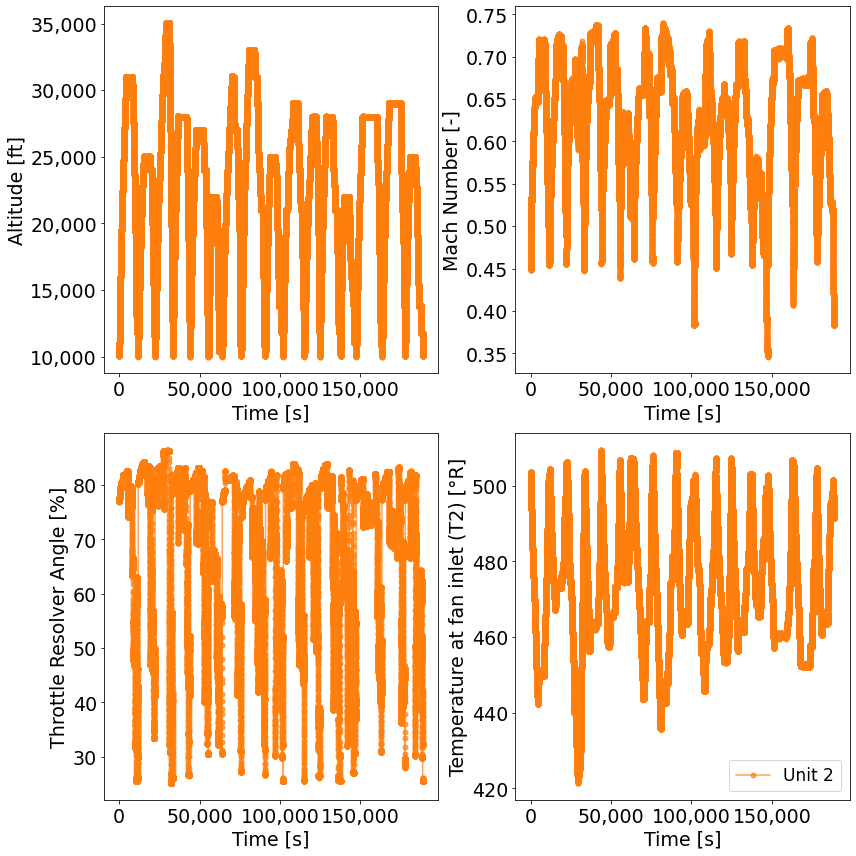

In [136]:
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet (T2) [°R]']
plot_df_color_per_unit(df_W_u, W_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')

<Figure size 432x288 with 0 Axes>

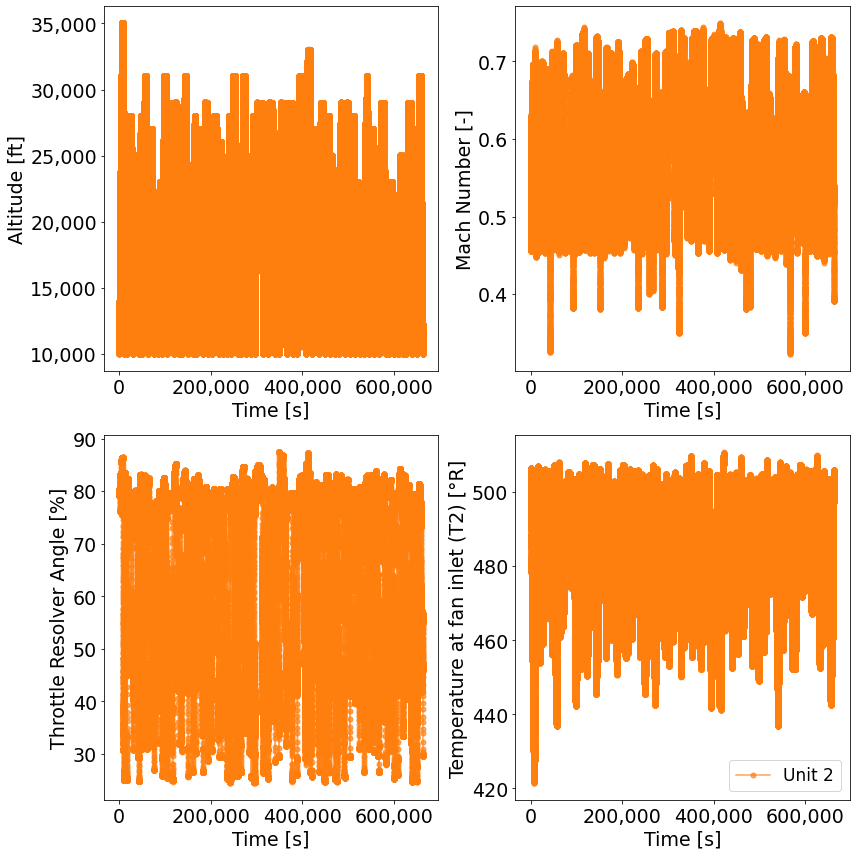

In [137]:
plot_df_color_per_unit(df_W_v, W_var, labels, size=12, labelsize=19, name='flight_profile_DS02.png')

In [138]:
df_X_s.head()

,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf,unit,cycle,Fc,hs
0,600.148034,1438.498187,1818.027714,1228.129848,15.806267,11.577097,16.046971,20.126624,331.293679,336.631827,12.629361,2160.926416,8591.373490,3.855337,2.0,1.0,3.0,1.0
1,600.055894,1438.350208,1817.682618,1227.879113,15.795477,11.568235,16.036017,20.113218,331.109867,336.446748,12.623033,2160.909333,8590.972866,3.852319,2.0,1.0,3.0,1.0
2,600.210756,1439.109101,1820.020627,1229.422522,15.807747,11.574866,16.048474,20.130956,331.753181,337.082502,12.637951,2161.819062,8593.031745,3.866201,2.0,1.0,3.0,1.0
3,600.369717,1439.240230,1819.188327,1228.538726,15.816360,11.578198,16.057218,20.146716,331.819136,337.162828,12.631509,2162.768666,8593.781545,3.863328,2.0,1.0,3.0,1.0
4,600.298227,1439.064004,1818.963540,1228.389046,15.807513,11.571593,16.048236,20.135888,331.626003,336.966936,12.624872,2162.619544,8593.220200,3.860818,2.0,1.0,3.0,1.0


In [140]:
df_Xs_u = df_X_s.loc[(df_A.unit == 2) & (df_A.hs == 1)]
df_Xs_v = df_X_s.loc[(df_A.unit == 2) & (df_A.hs == 0)]
df_Xs_u.reset_index(inplace=True, drop=True)
df_Xs_v.reset_index(inplace=True, drop=True)
labels = ['T24','T30','T48','T50','P15','P2','P21','P24','Ps30','P40','P50','Nf','Nc','Wf']

<Figure size 432x288 with 0 Axes>

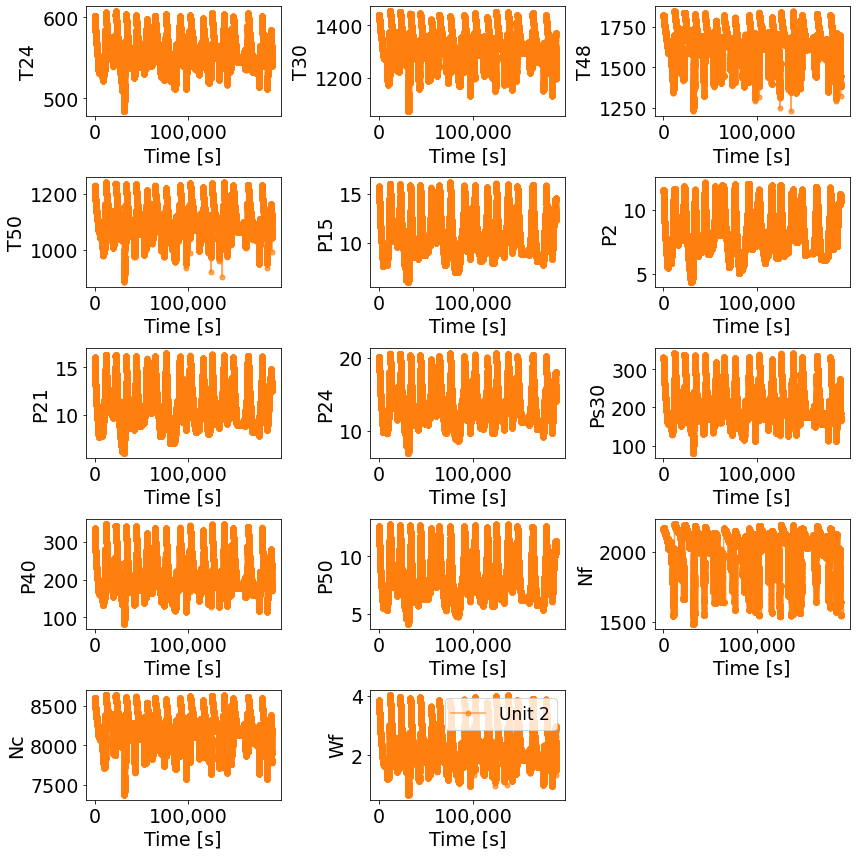

In [142]:
plot_df_color_per_unit(df_Xs_u, X_s_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')

<Figure size 432x288 with 0 Axes>

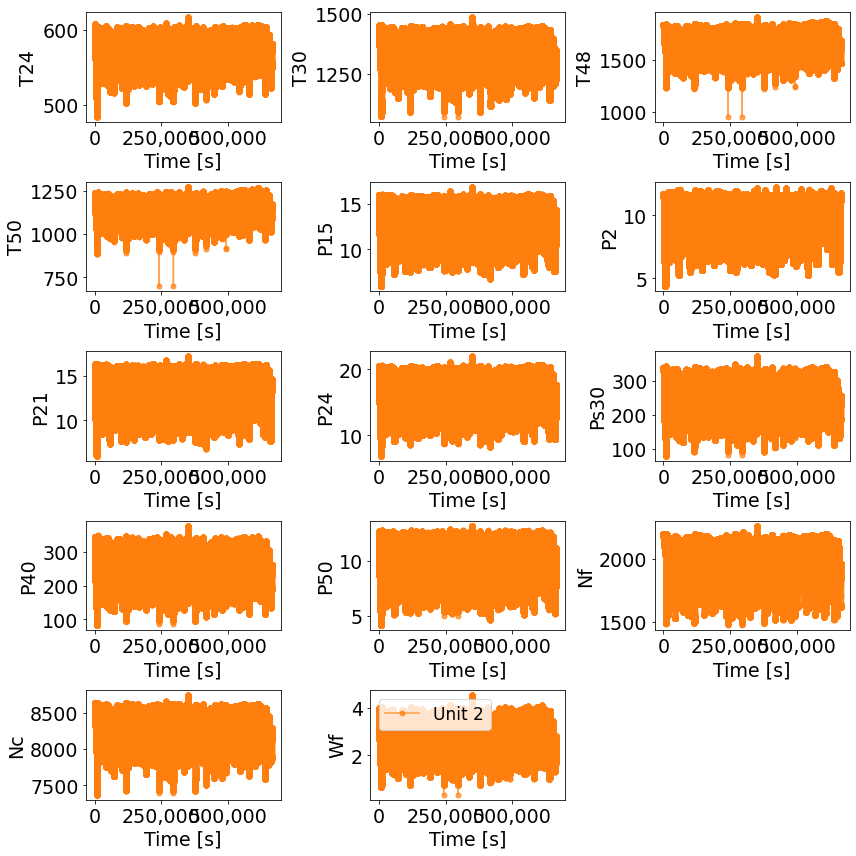

In [143]:
plot_df_color_per_unit(df_Xs_v, X_s_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')

In [144]:
df_X_v.head()

,T40,P30,P45,W21,W22,W25,W31,W32,W48,W50,SmFan,SmLPC,SmHPC,phi,unit,cycle,Fc,hs
0,2797.727106,352.494060,62.768751,2420.557738,228.486927,228.487065,26.498785,15.899271,215.844851,228.411666,16.648833,9.898130,25.376144,41.893990,2.0,1.0,3.0,1.0
1,2797.209328,352.300260,62.734717,2418.935113,228.382424,228.383505,26.486552,15.891931,215.745634,228.307014,16.639222,9.904927,25.380549,41.884434,2.0,1.0,3.0,1.0
2,2800.736255,352.965971,62.851755,2421.245669,228.651138,228.661083,26.519340,15.911604,216.019054,228.592279,16.649823,9.923503,25.318848,41.953848,2.0,1.0,3.0,1.0
3,2799.352383,353.050081,62.873081,2422.941615,228.786949,228.768625,26.532044,15.919226,216.121238,228.702994,16.653812,9.905518,25.361981,41.914342,2.0,1.0,3.0,1.0
4,2799.034785,352.844959,62.836600,2421.608933,228.651685,228.653631,26.518460,15.911076,216.008509,228.584788,16.649031,9.897465,25.363994,41.911503,2.0,1.0,3.0,1.0


In [145]:
df_Xv_u = df_X_v.loc[(df_A.unit == 2) & (df_A.hs == 1)]
df_Xv_v = df_X_v.loc[(df_A.unit == 2) & (df_A.hs == 0)]
df_Xv_u.reset_index(inplace=True, drop=True)
df_Xv_v.reset_index(inplace=True, drop=True)
labels = ['T40','P30','P45','W21','W22','W25','W31','W32','W48','W50','SmFan','SmLPC','SmHPC','phi']

MemoryError: Unable to allocate 895. MiB for an array with shape (18, 6517190) and data type float64

In [156]:
df_T.head()

,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,cycle,Fc,hs
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [159]:
df_T_u = df_T.loc[(df_A.unit == 2) & (df_A.hs == 1)]
df_T_v = df_T.loc[(df_A.unit == 2) & (df_A.hs == 0)]
df_T_u.reset_index(inplace=True, drop=True)
df_T_v.reset_index(inplace=True, drop=True)
labels = ['fan_eff_mod','fan_flow_mod','LPC_eff_mod','LPC_flow_mod','HPC_eff_mod','HPC_flow_mod','HPT_eff_mod','HPT_flow_mod','LPT_eff_mod','LPT_flow_mod']

<Figure size 432x288 with 0 Axes>

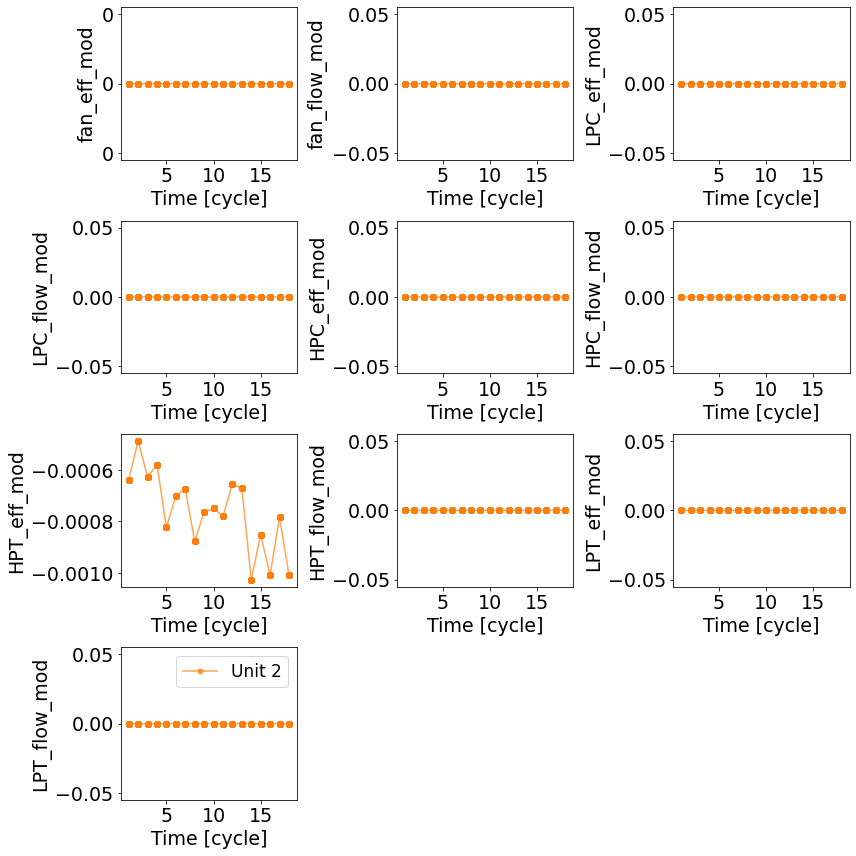

In [163]:
plot_df_color_per_unit(df_T_u, T_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')

<Figure size 432x288 with 0 Axes>

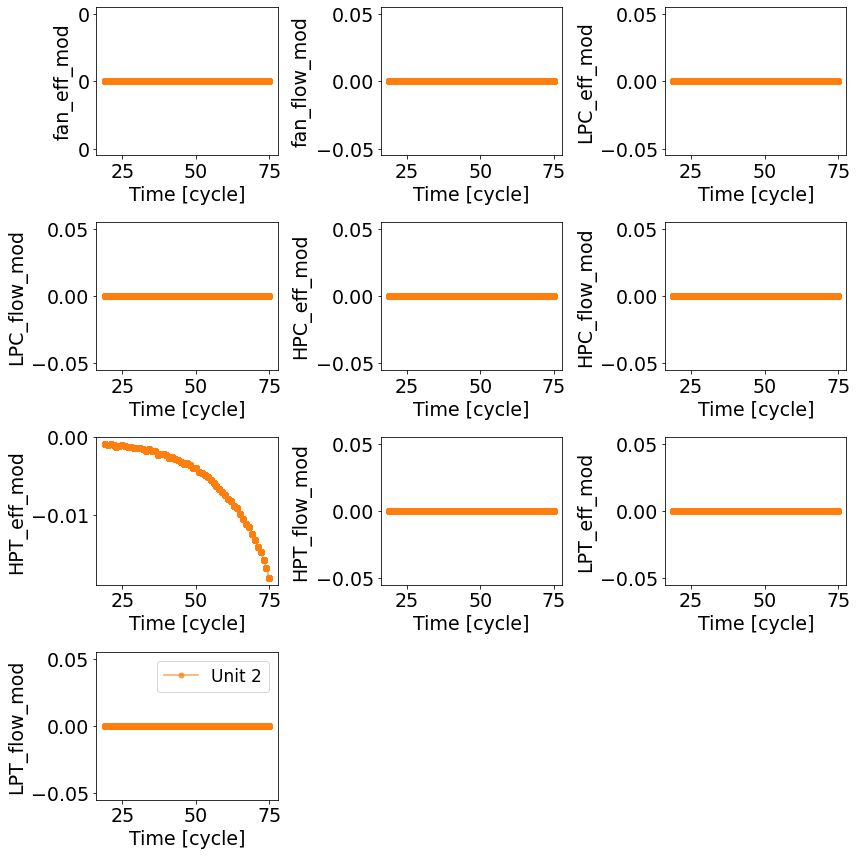

In [164]:
plot_df_color_per_unit(df_T_v, T_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')